In [32]:
import pymssql
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

database = "arctic_analysts_capstone"
user = "arctic_analysts"
password  = "ThisPassw0rd!"
server = "gen10-data-fundamentals-22-02-sql-server.database.windows.net"

def sql_query(query):
    conn = pymssql.connect(server, user, password, database)
    cursor = conn.cursor()
    queried_data = pd.read_sql(query, conn)
    return queried_data

In [33]:
def run_queries():
    tables = ["year", "month", "county", "median_income", "main_table"]

    query = f"SELECT * FROM {tables[0]}"
    year_df = sql_query(query)

    query = f"SELECT * FROM {tables[1]}"
    month_df = sql_query(query)

    query = f"SELECT * FROM {tables[2]}"
    county_df = sql_query(query)

    query = f"SELECT * FROM {tables[3]}"
    median_income_df = sql_query(query)

    query = f"SELECT * FROM {tables[4]}"
    main_table = sql_query(query)

    all_df = [year_df, month_df, county_df, median_income_df, main_table]
    return all_df

In [34]:
def join_tables(all_df):
    year_df = all_df[0]
    month_df = all_df[1]
    county_df = all_df[2]
    median_income_df = all_df[3]
    main_table = all_df[4]

    master_table = pd.merge(
        main_table, year_df, left_on="YearID", right_on="YearID", how="outer"
    )
    print(master_table.shape[0])
    # Now has 5607 rows

    master_table = pd.merge(
        master_table, month_df, left_on="MonthID", right_on="MonthID", how="outer"
    )
    # Now has 5607 rows
    print(master_table.shape[0])

    master_table = pd.merge(
        master_table, county_df, left_on="FIPS", right_on="FIPS", how="outer"
    )
    # Now has 5607 rows
    print(master_table.shape[0])

    master_table = pd.merge(
        master_table,
        median_income_df,
        left_on=["FIPS", "YearID"],
        right_on=["FIPS", "YearID"],
        how="outer",
    )
    # Now has 20727 rows
    print(master_table.shape[0])

    master_table.loc[(master_table.MedianIncome < 0), "MedianIncome"] = None
    return master_table

In [35]:
all_df = run_queries()
master_table = join_tables(all_df)

5607
5607
5607
20727


In [36]:
counties_list = master_table.County.unique()
counties_list

array(['Atlantic County', 'Bergen County', 'Burlington County',
       'Camden County', 'Cape May County', 'Cumberland County',
       'Essex County', 'Gloucester County', 'Hudson County',
       'Hunterdon County', 'Mercer County', 'Middlesex County',
       'Monmouth County', 'Morris County', 'Ocean County',
       'Passaic County', 'Salem County', 'Somerset County',
       'Sussex County', 'Union County', 'Warren County'], dtype=object)

In [37]:
final_table = master_table[(master_table['AgeGroup'] == '25-44') & (master_table['County'] == 'Atlantic County')]
final_table

,FIPS,YearID,MonthID,NewUnits,NewBuildings,MedianHousePrice,AverageRate,AveragePoints,Year,Month,County,AgeGroup,MedianIncome
60,34001,6,1,107,103,249344.0,5.71,0.7,2005,Jan,Atlantic County,25-44,52040.0
65,34001,6,2,129,129,252209.0,5.63,0.7,2005,Feb,Atlantic County,25-44,52040.0
70,34001,6,3,165,162,254847.0,5.93,0.7,2005,Mar,Atlantic County,25-44,52040.0
75,34001,6,4,184,163,258515.0,5.86,0.6,2005,Apr,Atlantic County,25-44,52040.0
80,34001,6,5,135,134,262680.0,5.72,0.6,2005,May,Atlantic County,25-44,52040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,34001,20,8,102,43,213268.0,3.62,0.5,2019,Aug,Atlantic County,25-44,65106.0
940,34001,20,9,16,16,213949.0,3.61,0.5,2019,Sep,Atlantic County,25-44,65106.0
945,34001,20,10,88,42,213966.0,3.69,0.6,2019,Oct,Atlantic County,25-44,65106.0
950,34001,20,11,53,39,213462.0,3.70,0.6,2019,Nov,Atlantic County,25-44,65106.0


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


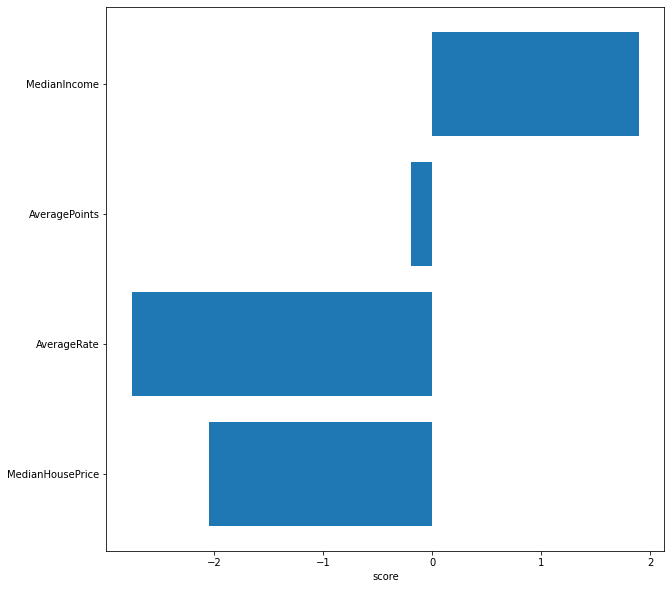

e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        33

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


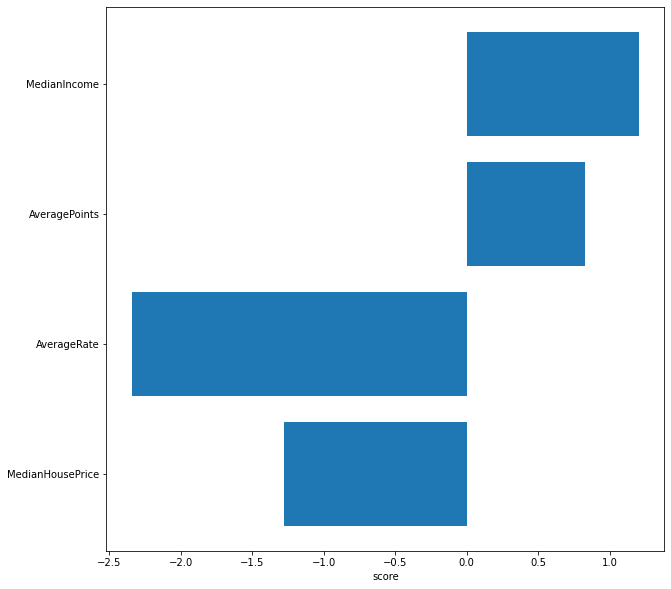

e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        33

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



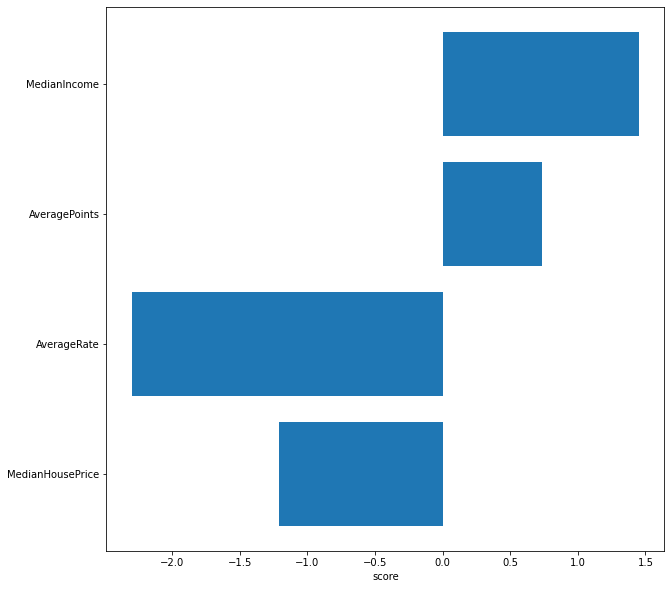

e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        37

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



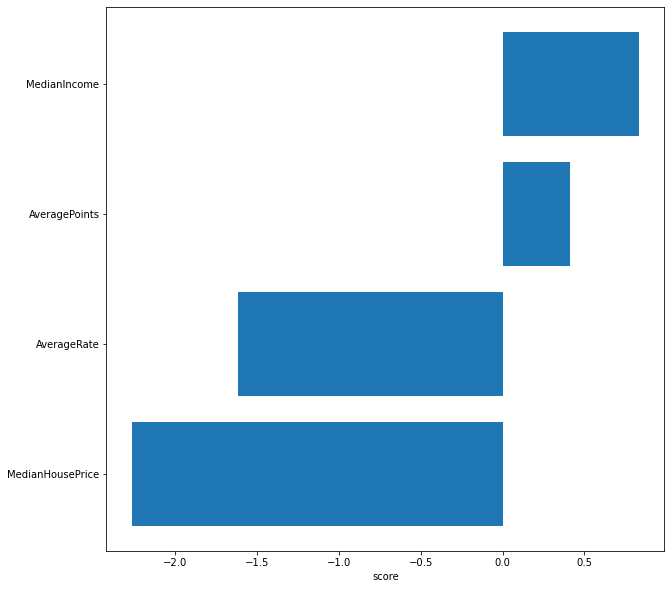

e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.90      0.95        39

    accuracy                           0.91        45
   macro avg       0.80      0.95      0.85        45
weighted avg       0.95      0.91      0.92        45



e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


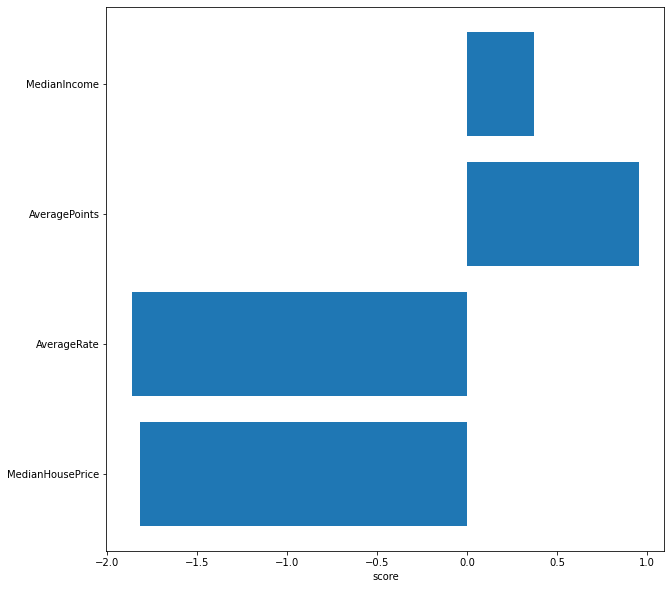

e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        21

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



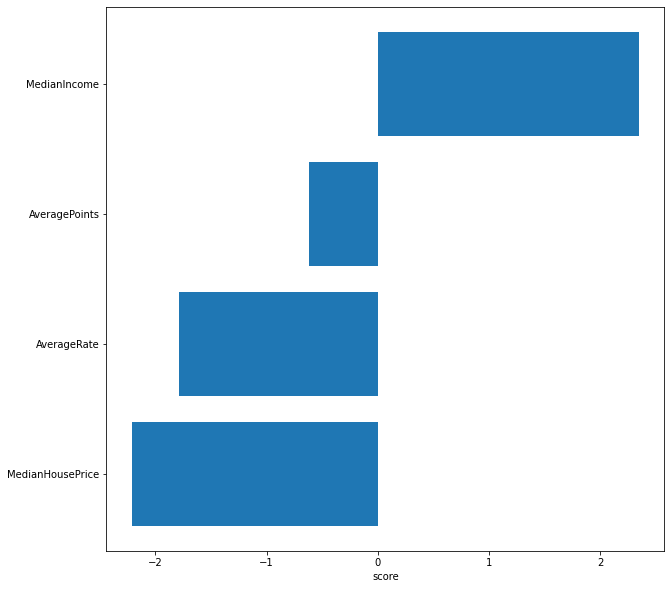

e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        29

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



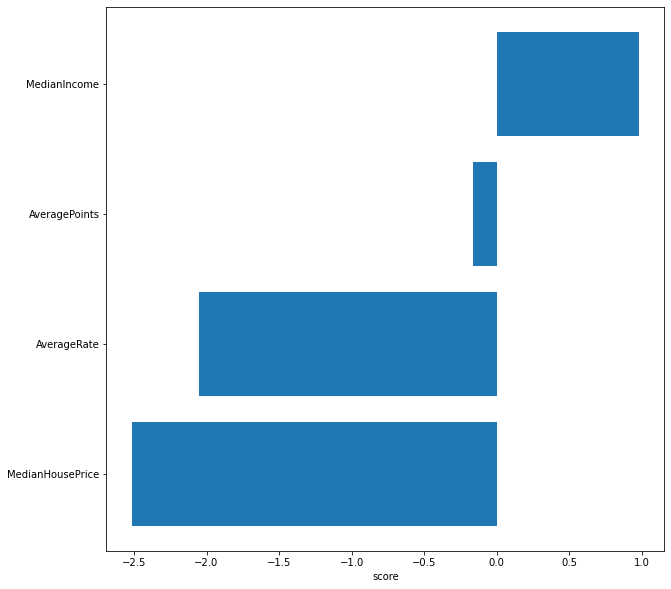

e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.81      1.00      0.89        17

    accuracy                           0.91        45
   macro avg       0.90      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



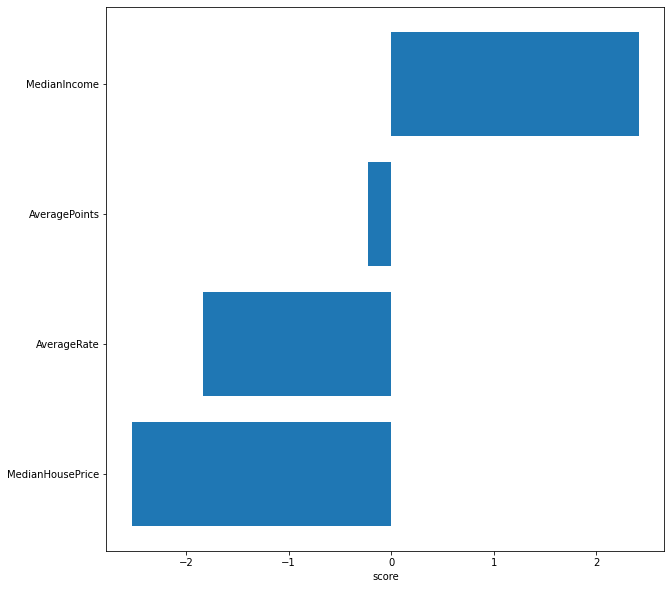

e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.82      1.00      0.90         9

    accuracy                           0.96        45
   macro avg       0.91      0.97      0.94        45
weighted avg       0.96      0.96      0.96        45



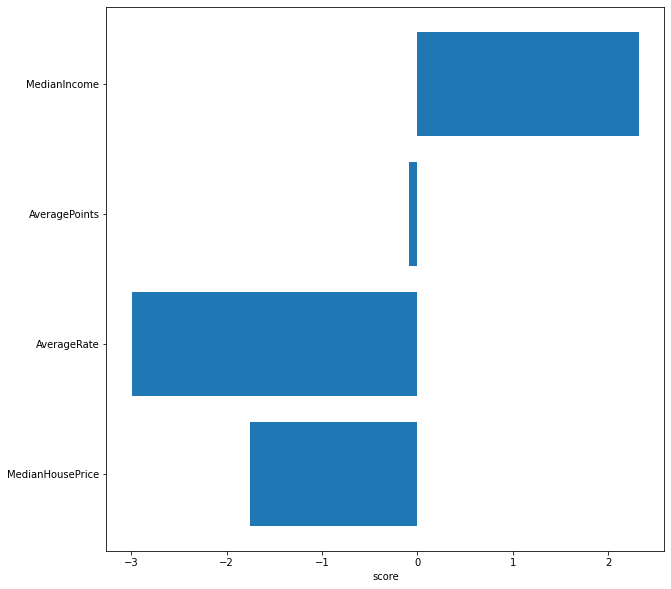

e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.97      0.89      0.93        35
           1       0.69      0.90      0.78        10

    accuracy                           0.89        45
   macro avg       0.83      0.89      0.85        45
weighted avg       0.91      0.89      0.89        45



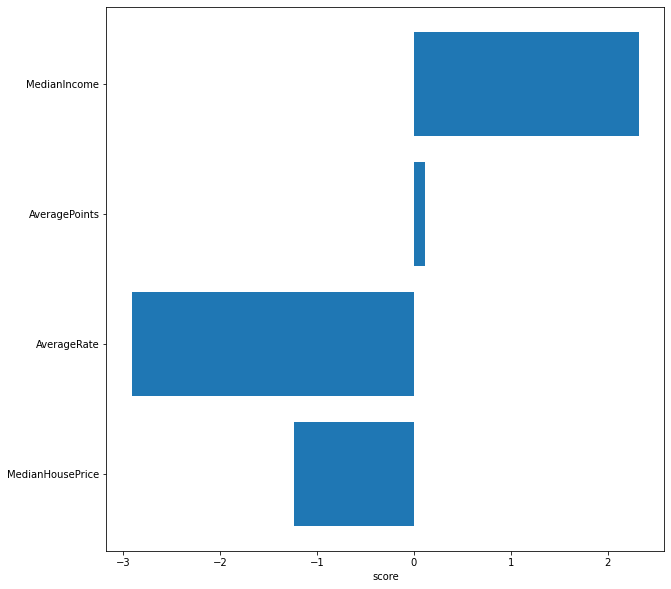

e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        41
           1       0.29      1.00      0.44         4

    accuracy                           0.78        45
   macro avg       0.64      0.88      0.65        45
weighted avg       0.94      0.78      0.82        45



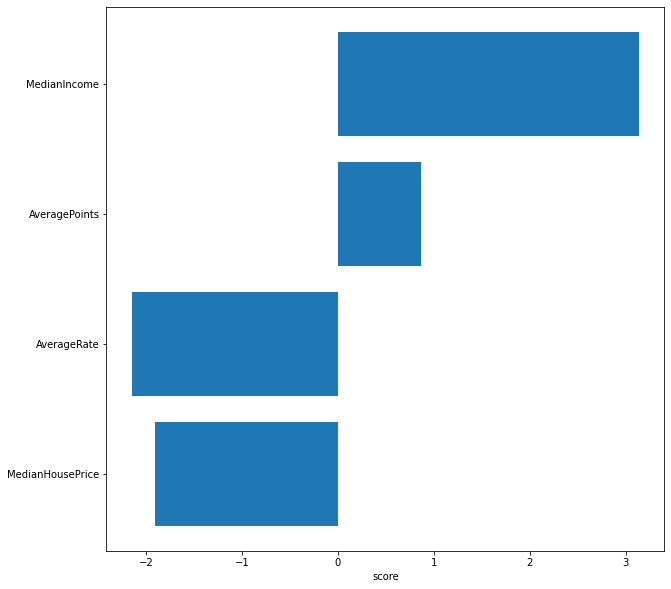

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        33

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


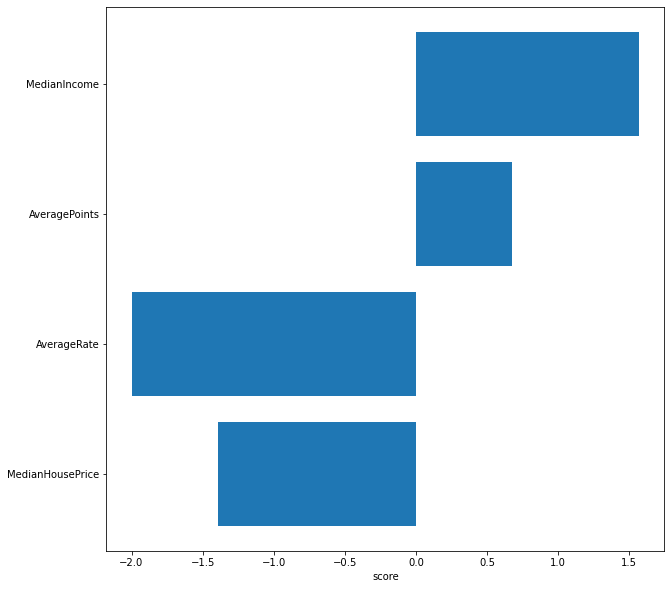

e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
e:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        33

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



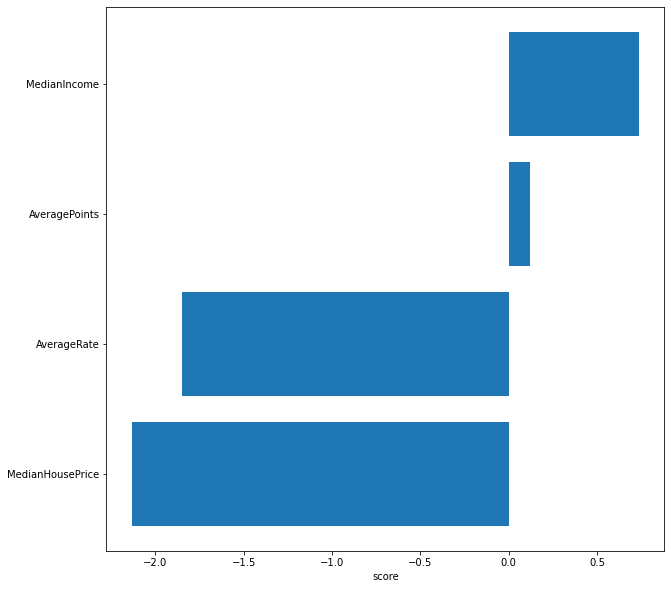

['Bergen County', 'Cape May County', 'Essex County', 'Hudson County', 'Monmouth County', 'Passaic County', 'Salem County', 'Union County']


In [38]:
all_zero_list = []
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('out.pdf')
for county in counties_list:
    try:
        final_table = master_table[(master_table['AgeGroup'] == '25-44') & (master_table['County'] == county)]
        # buildings_df = master_table[(master_table['AgeGroup'] == '25-44') & (master_table['County'] == county)][['Year','Month','NewUnits','NewBuildings']]
        # buildings_df['Year'] = buildings_df['Year']+2
        final_table.drop(['NewUnits','NewBuildings'],axis=1, inplace=True)
        # final_table = pd.merge(county_df, buildings_df, left_on=['Year','Month'],right_on=['Year','Month'],how='inner')
        final_table = final_table.dropna()

        #calculate monthly income
        final_table['MonthlyIncome'] = final_table['MedianIncome']/12

        #calculate montly mortgage payment
        #https://www.educba.com/mortgage-formula/

        for row in final_table:
            P = final_table['MedianHousePrice']-(final_table['MedianHousePrice']*.2).copy()
            r = (final_table['AverageRate']/100)
            t = 30
            n = 12
            monthly_tax = (final_table['MedianHousePrice']*.0189)/12
            final_table['MonthlyMortgage'] = (P * (((r/n) * pow((1+(r/n)),(n*t))) / (pow((1+r/n),(n*t))-1))) + monthly_tax


        # mortgage to income ratio
        final_table['mortgage_income_ratio'] = final_table['MonthlyMortgage']/final_table['MonthlyIncome']

        #affordability determination
        def affordable_condition(x):
            if x <= .25:
                return 'Yes'
            elif np.isnan(x):
                return 'Missing'
            else:
                return 'No'

        final_table['affordable'] = final_table['mortgage_income_ratio'].apply(affordable_condition)
        # print(final_table)

        # dropping calculated columns
        ml_table = final_table.drop(['MonthlyMortgage','MonthlyIncome','mortgage_income_ratio'],axis=1)

        # list of numerical columns
        numerical = ['MedianHousePrice', 'AverageRate', 'AveragePoints', 'MedianIncome']

        # standardizing 
        sc_X = StandardScaler()
        numerical_standard = sc_X.fit_transform(ml_table[['MedianHousePrice', 'AverageRate','AveragePoints', 'MedianIncome']])

        # numerical_ml = ml_table[['NewUnits','NewBuildings', 'MedianHousePrice', 'AverageRate',
        #        'AveragePoints', 'MedianIncome']]

        # creating a list of numerical columns
        # numerical_ml = ml_table[['NewUnits','NewBuildings', 'MedianHousePrice', 'AverageRate',
        #        'AveragePoints', 'MedianIncome']]
        numerical_ml = pd.DataFrame(data=numerical_standard,columns=numerical)

        # dropping numerical columns from mmain ml_table
        # ml_table.drop(numerical,axis=1, inplace=True)

        # changing Year to string for categorical
        # ml_table['Year'] = ml_table['Year'].astype('string')

        # Year = pd.get_dummies(ml_table['Year'],drop_first=True)

        # County = pd.get_dummies(ml_table['County'],drop_first=True)

        # AgeGroup = pd.get_dummies(ml_table['AgeGroup'],drop_first=True)

        # Month = pd.get_dummies(ml_table['Month'],drop_first=True)


        labels = pd.DataFrame(ml_table['affordable'])
        labels.affordable[labels.affordable =='Yes'] =1
        labels.affordable[labels.affordable=='No']=0

        # ml_table = pd.concat([ml_table.reset_index(drop=True),numerical_df.reset_index(drop=True)], axis=1)
        # ml_table.drop(['Year','County','AgeGroup','Month','FIPS'],axis=1, inplace=True)
        # ml_table.reset_index(drop=True)
        # numerical_ml = pd.concat([numerical_df.reset_index(drop=True),Year.reset_index(drop=True),County.reset_index(drop=True),Month.reset_index(drop=True)],axis=1)
        # categorical_ml = pd.concat([Year,Month],axis=1)
        # all_ml = pd.concat([numerical_ml.reset_index(drop=True),Year.reset_index(drop=True),Month.reset_index(drop=True)],axis=1)

        # all_ml = pd.concat([numerical_ml.reset_index(drop=True),Year,Month],axis=1)   

        # numerical 

        numerical_ml = numerical_ml.apply(pd.to_numeric)
        labels = labels.apply(pd.to_numeric)

        X_train, X_test, y_train, y_test = train_test_split(numerical_ml, labels,test_size=0.25,random_state=0)
        numerical_ml_log = LogisticRegression(random_state=0,class_weight='balanced')
        numerical_ml_log.fit(X_train,y_train)
        y_pred = numerical_ml_log.predict(X_test)
        print(classification_report(y_test, y_pred))
        importance = numerical_ml_log.coef_.flatten()
        df = pd.DataFrame(importance,numerical_ml.columns)

        plt.rcParams['figure.figsize'] = (10,10)
        plt.barh(numerical_ml.columns, importance)
        plt.xlabel('score')
        plt.show()
        
    except ValueError:
        all_zero_list.append(county)
        
        # print(final_table.affordable.value_counts())
# pdf.close()
print(all_zero_list)

In [ ]:
# if worthwhile, then add  1. ordinal year, which is YearID, 2. get dummies counties
# standardize new incoming inputs
# merge
# predict 
